<h1 align='center'> Predicting hourly traffic volume between Minneapolis - St. Paul</h1>

Dataset can be found on the UCI Machine Learning repository - http://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume <br>

Dataset contains data about hourly traffic volumes, weather conditions and holidays from 2012 - 2018 between Minneapolis and St. Paul.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('F:/DS/Datasets/Metro_Interstate_Traffic_Volume.csv')

In [3]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
holiday                48204 non-null object
temp                   48204 non-null float64
rain_1h                48204 non-null float64
snow_1h                48204 non-null float64
clouds_all             48204 non-null int64
weather_main           48204 non-null object
weather_description    48204 non-null object
date_time              48204 non-null object
traffic_volume         48204 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
data.isnull().sum().sum()

0

Dataset is clean and does not have any missing values.<br><br>

### Renaming columns

In [6]:
data.columns = ['holiday', 'temp_in_kelvin', 'rain_in_mm', 'snow_in_mm', 'cloud%', 'weather', 'weather_description',\
                'date_time', 'traffic_volume']

holiday - Categorical US National holidays plus regional holiday, Minnesota State Fair <br>
temp_in_kelvin - Numeric Average temp in kelvin <br>
rain_in_mm - Numeric Amount in mm of rain that occurred in the hour <br>
snow_in_mm - Numeric Amount in mm of snow that occurred in the hour <br>
cloud% - Numeric Percentage of cloud cover <br>
weather - Categorical Short textual description of the current weather <br>
weather_description - Categorical Longer textual description of the current weather <br> 
date_time - DateTime Hour of the data collected in local CST time <br>
traffic_volume - Numeric Hourly I-94 ATR 301 reported westbound traffic volume <br>

<br><br>
### Getting only time from date_time column and dropping date_time column.

In [7]:
data['time'] = data['date_time'].apply(lambda x: x[11:])
data.drop(columns=['date_time'], inplace=True)

In [8]:
data.head()

,holiday,temp_in_kelvin,rain_in_mm,snow_in_mm,cloud%,weather,weather_description,traffic_volume,time
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,09:00:00
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,10:00:00
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,11:00:00
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,12:00:00
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,13:00:00


In [9]:
categorical_columns = ['holiday', 'weather', 'weather_description']

for cat in categorical_columns:
    print('Feature:', cat, ' | Number of unique values:' , data[cat].nunique(), '\n')

Feature: holiday  | Number of unique values: 12 

Feature: weather  | Number of unique values: 11 

Feature: weather_description  | Number of unique values: 38 



In [10]:
plt.rcParams['figure.figsize'] = 10, 8
sns.set_style(style='darkgrid')

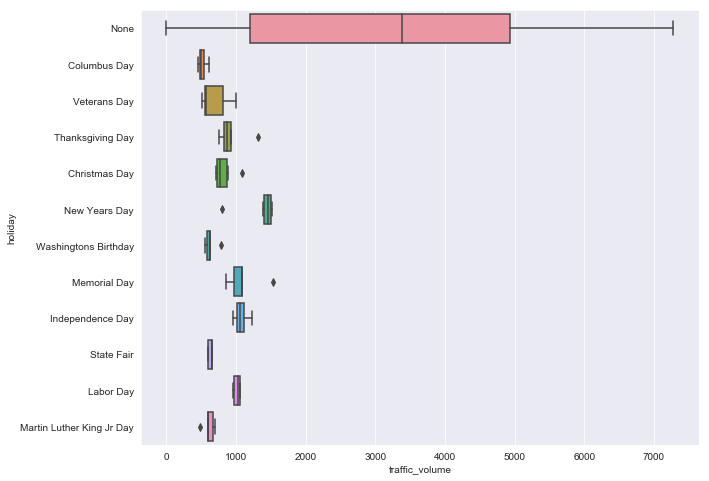

In [11]:
sns.boxplot(data=data, y='holiday', x='traffic_volume')
plt.show()

It is clearly evident from the above viz that traffic volume drastically reduces during holidays and hourly traffic volume is usually limited to under 1500.

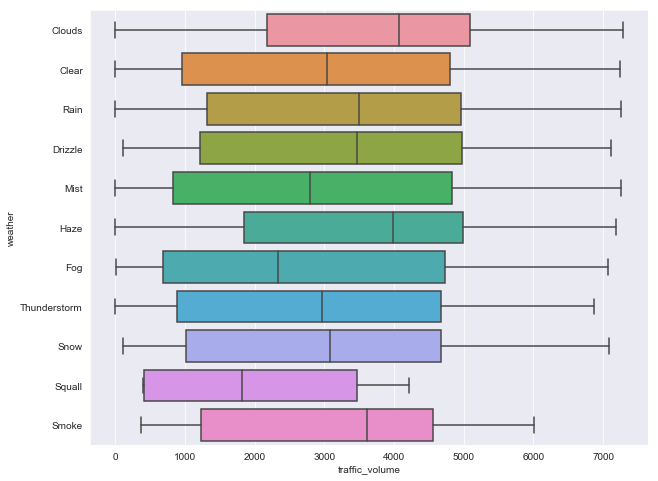

In [12]:
sns.boxplot(data=data, y='weather', x='traffic_volume')
plt.show()

<br><br>
### Correlation between numerical features and target variable

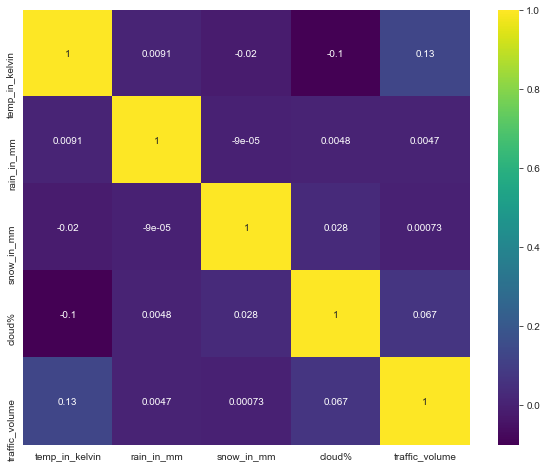

In [13]:
sns.heatmap(data=data.corr(), cmap='viridis', annot=True)
plt.show()

None of the numerical features are highly correlated to **traffic_volume** and the same can be confirmed from the pairplot below.

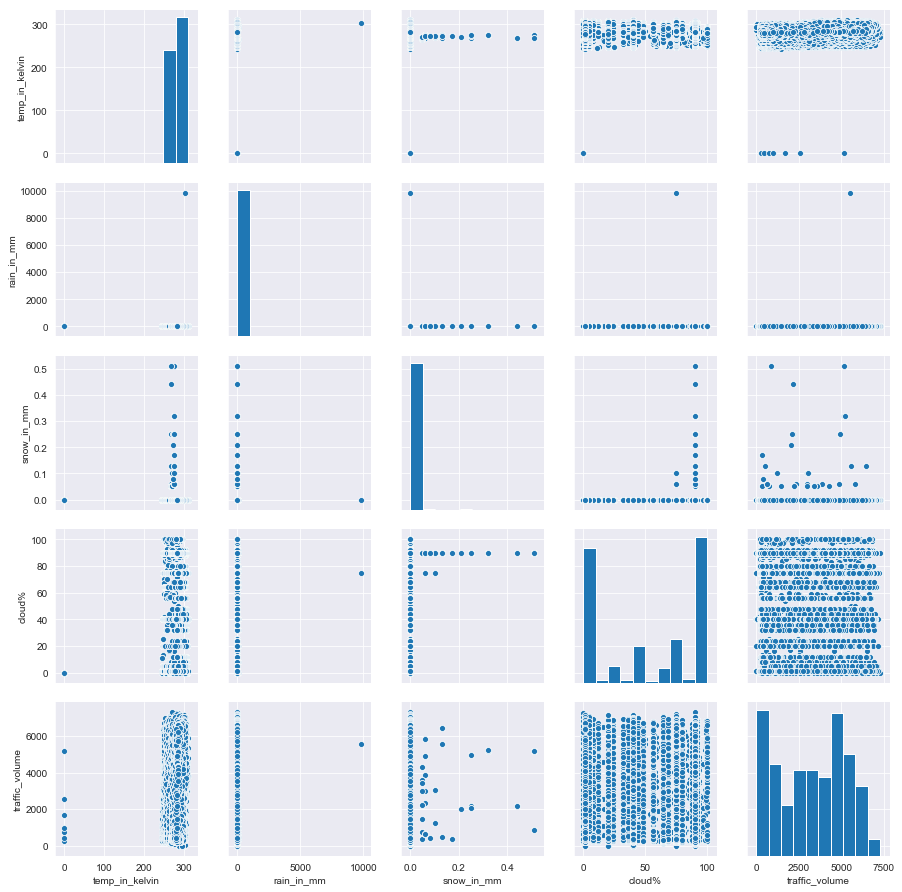

In [14]:
sns.pairplot(data=data)
plt.show()

<br><br>
### Traffic volumes during different times of the day

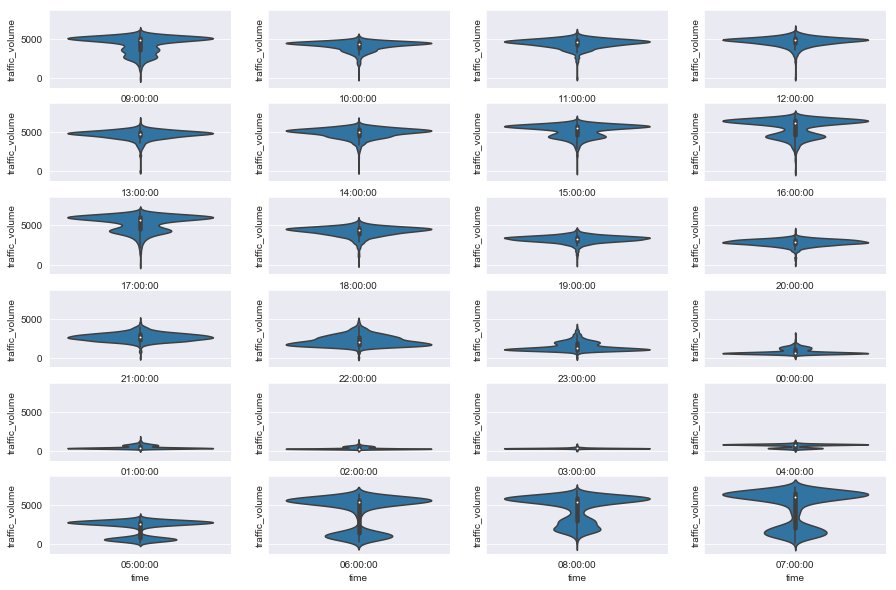

In [15]:
time_values = data['time'].unique().tolist()

fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(15,10), sharey=True)

i=0
for r in range(6):
    for c in range(4):
        sns.violinplot(data=data, 
                    x=data[data['time']==time_values[i]]['time'], 
                    y=data[data['time']==time_values[i]]['traffic_volume'],
                    ax=ax[r][c]
                   )
        i+=1
    
plt.show()

Peak traffic volumes are at 9am, 4pm and 5pm(usual rush hour times).<br>
Traffic volume gradually decreases after 5pm. <br>

<br><br>
### Traffic volumes across different weather conditions

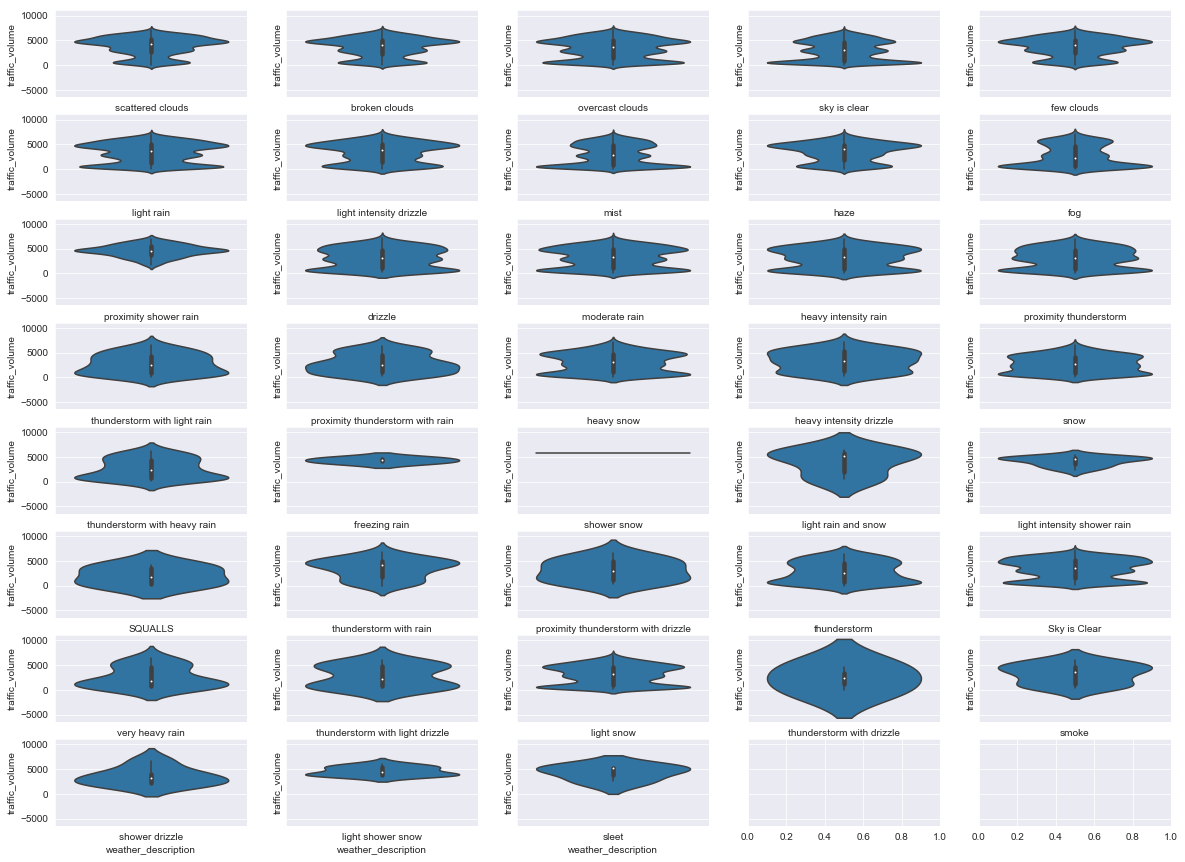

In [16]:
weather_desc_values = data['weather_description'].unique().tolist()

fig, ax = plt.subplots(nrows=8, ncols=5, figsize=(20, 15), sharey=True)

i=0
for r in range(8):
    for c in range(5):
        if r == 7 and c >= 3:
            break
        sns.violinplot(data=data, 
                        x=data[data['weather_description']==weather_desc_values[i]]['weather_description'], 
                        y=data[data['weather_description']==weather_desc_values[i]]['traffic_volume'],
                        ax=ax[r][c],
                       )
        i+=1
        
plt.show()

There are 38 weather conditions. Using a 8 * 5 matrix, we are bound to get two empty subplots.

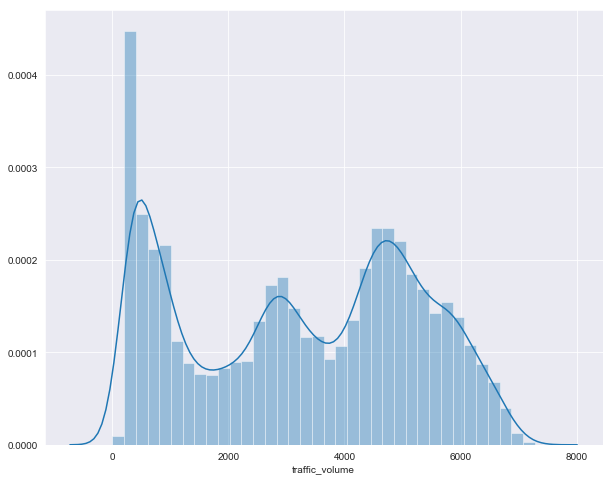

In [17]:
sns.distplot(data['traffic_volume'])
plt.show()

In [18]:
data = pd.get_dummies(data)

In [19]:
data.head()

,temp_in_kelvin,rain_in_mm,snow_in_mm,cloud%,traffic_volume,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,...,time_14:00:00,time_15:00:00,time_16:00:00,time_17:00:00,time_18:00:00,time_19:00:00,time_20:00:00,time_21:00:00,time_22:00:00,time_23:00:00
0,288.28,0.0,0.0,40,5545,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,289.36,0.0,0.0,75,4516,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,289.58,0.0,0.0,90,4767,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,290.13,0.0,0.0,90,5026,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,291.14,0.0,0.0,75,4918,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone
from sklearn.feature_selection import SelectKBest, RFE

In [21]:
kf = KFold(n_splits=5)
X = data.drop(columns=['traffic_volume'])
y = data['traffic_volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
gbr = GradientBoostingRegressor()
rfe = RFE(gbr, 25)
fit = rfe.fit(X_train, y_train)
feat = fit.support_
features_df = pd.DataFrame(data=fit.support_, index=X_train.columns, columns=['Important'])
features_df.sample(5)

,Important
holiday_Washingtons Birthday,False
weather_Haze,False
time_08:00:00,True
time_07:00:00,True
time_06:00:00,False


In [23]:
imp_features = features_df[features_df['Important'] == True]['Important'].index.tolist()
X = data[imp_features]
y = data['traffic_volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
# lasso = Lasso()
# param_grid = {'alpha' : np.arange(0.1, 10, 0.1)}
# grid = GridSearchCV(estimator=lasso, param_grid=param_grid, refit=True, cv=kf)
# grid.fit(X_train, y_train)
# grid.best_params_

{'alpha': 0.1}

In [25]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [26]:
lasso_pred = lasso.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_test, lasso_pred)))
print('r^2: ', r2_score(y_test, lasso_pred))

RMSE:  3218.646635543255
r^2:  -1.6037164565270046


In [27]:
# gbr = GradientBoostingRegressor()
# param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2],
#               'max_depth': [3, 4, 5, 6, 7]
#              }
# grid = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=kf, refit=True)
# grid.fit(X_train, y_train)
# grid.best_params_

In [28]:
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=4)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
gbr_pred = gbr.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_test, gbr_pred)))
print('r^2: ', r2_score(y_test, gbr_pred))

RMSE:  910.7982180690315
r^2:  0.791507021609726


In [30]:
# rf = RandomForestRegressor()
# param_grid = {'n_estimators': np.arange(100, 600, 100)}
# grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf, refit=True)
# grid.fit(X_train, y_train)
# grid.best_params_

In [31]:
rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
rf_pred = rf.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('r^2: ', r2_score(y_test, rf_pred))

RMSE:  945.1324767354624
r^2:  0.7754916685154843


In [33]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    
    def __init__(self, base_models, meta_model):
        self.base_models = base_models
        self.meta_model = meta_model
        
    def fit(self, X, y):
        self.cl_base_models = [list() for model in self.base_models]
        self.cl_meta_model = clone(self.meta_model)
        kfold = KFold(n_splits=5, shuffle=True, random_state=42)
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models))) 
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.cl_base_models[i].append(instance)
                instance.fit(X.iloc[train_index], y.iloc[train_index])
                y_pred = instance.predict(X.iloc[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        self.cl_meta_model.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.cl_base_models])
        return self.cl_meta_model.predict(meta_features)

In [34]:
stacked_avg_models = StackingAveragedModels(base_models=(gbr, rf), meta_model=(lasso))
stacked_avg_models.fit(X_train, y_train)

StackingAveragedModels(base_models=(GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sa...ators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)),
            meta_model=Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))

In [35]:
stacked_pred = stacked_avg_models.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_test, stacked_pred)))
print('r^2: ', r2_score(y_test, stacked_pred))

RMSE:  894.1463640606131
r^2:  0.7990609620396567


In [36]:
#Weighted averaging. More weight given to stacked model since it produced the best result.
ensemble = stacked_pred * 0.70 + gbr_pred * 0.20 + rf_pred * 0.10
print('RMSE: ', np.sqrt(mean_squared_error(y_test, ensemble)))
print('r^2: ', r2_score(y_test, ensemble))

RMSE:  892.8034491637044
r^2:  0.7996640878800008


### Using ensemble methods  like Stacking and weighted averaging, there is a significant decrease in the RMSE value and r^2 score is very close to 0.80.